# <font color='red'>TAITANIC SURVIVAL PREDICTION</font>

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [154]:
taitanic_data=pd.read_csv("D:\\MACHINE LAERNING\\codsoft\\tested.csv")
taitanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [255]:
#sibp =no fo children/spouse    spouse=partner
#parch=the no of parent or children had an abord
#embarked=port of Embarktion C=Cherbourg,S=Southampton,Q=Queenstown
#pclass=Ticket Class 1st=Upper,2nd=Middle,3rd=Lower

In [155]:
taitanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [156]:
taitanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [157]:
mean=taitanic_data['Age'].mean()
std=taitanic_data['Age'].std()
#No of null values 86
print(mean,std)

30.272590361445783 14.18120923562442


In [158]:
a=np.random.randint(mean-std,mean+std,86)
a

array([16, 36, 24, 35, 18, 29, 39, 33, 27, 26, 39, 36, 35, 38, 26, 32, 42,
       22, 39, 32, 39, 35, 37, 26, 19, 24, 41, 27, 25, 41, 20, 21, 25, 40,
       42, 21, 28, 34, 23, 40, 33, 22, 29, 20, 34, 43, 39, 29, 17, 42, 43,
       41, 24, 43, 21, 19, 42, 32, 32, 41, 23, 42, 18, 38, 38, 37, 18, 23,
       16, 42, 39, 23, 40, 21, 42, 41, 18, 43, 20, 17, 42, 16, 30, 26, 24,
       21])

In [159]:
for i in a:
    for NaN in taitanic_data['Age']:
        taitanic_data['Age'].fillna(i,inplace=True)

In [160]:
taitanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [256]:
taitanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.364508,2.263789,27.256595,0.448441,0.393285,35.627188
std,0.481870,0.842077,13.813514,0.897568,0.982419,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,16.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


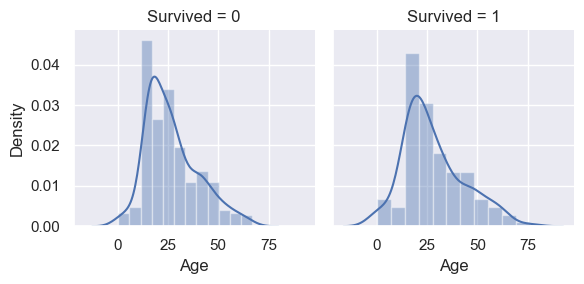

In [250]:
#data visuvalisation and understanding the data
#AGE
a=sns.FacetGrid(data=taitanic_data,col='Survived')
a.map(sns.distplot,'Age')
plt.show()

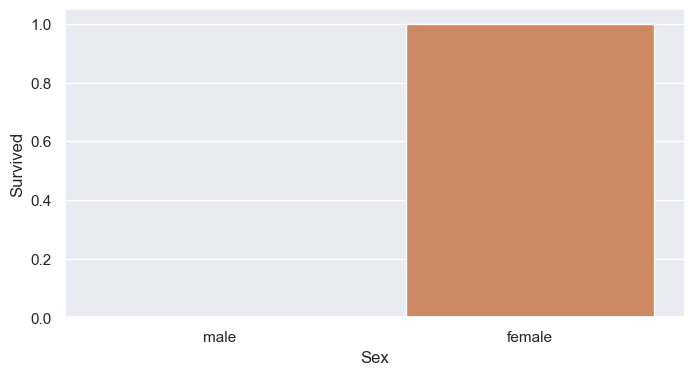

In [225]:
#SEX
sns.barplot(data=taitanic_data,x='Sex',y='Survived',ci=None)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

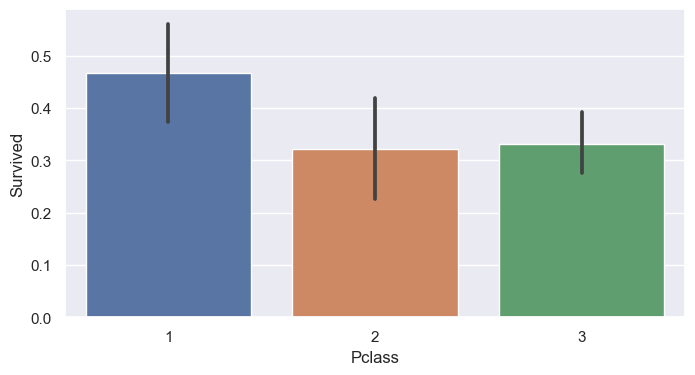

In [226]:
##PCLASS
sns.barplot(data=taitanic_data,x='Pclass',y='Survived')

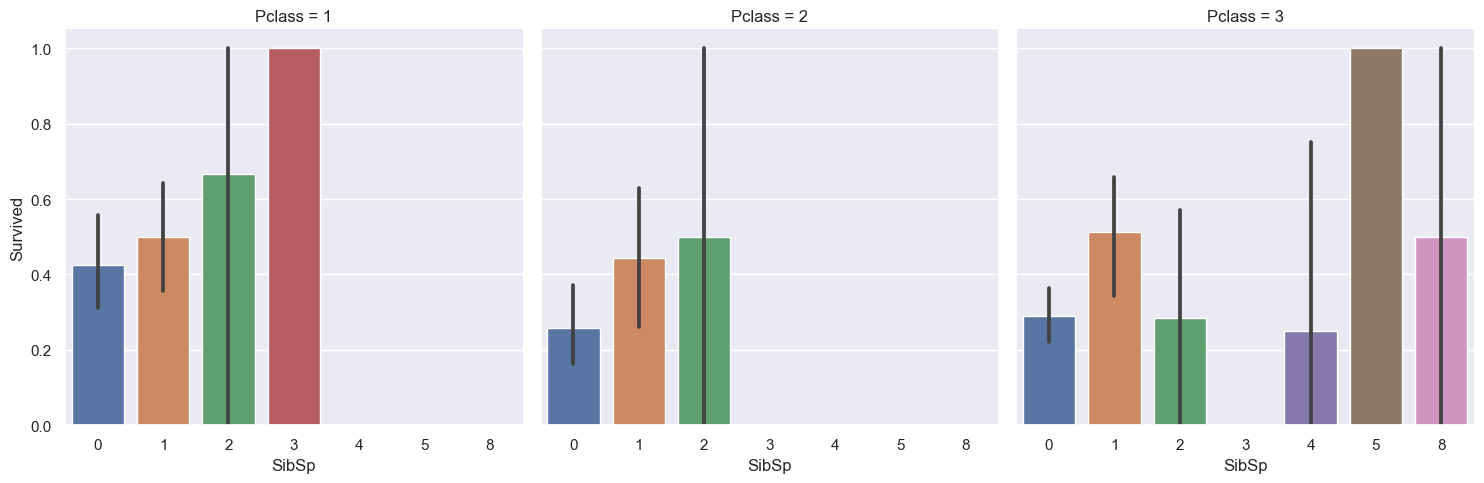

In [253]:
#SIBSP
sns.factorplot(data=taitanic_data,x='SibSp',y='Survived',kind='bar',col='Pclass')

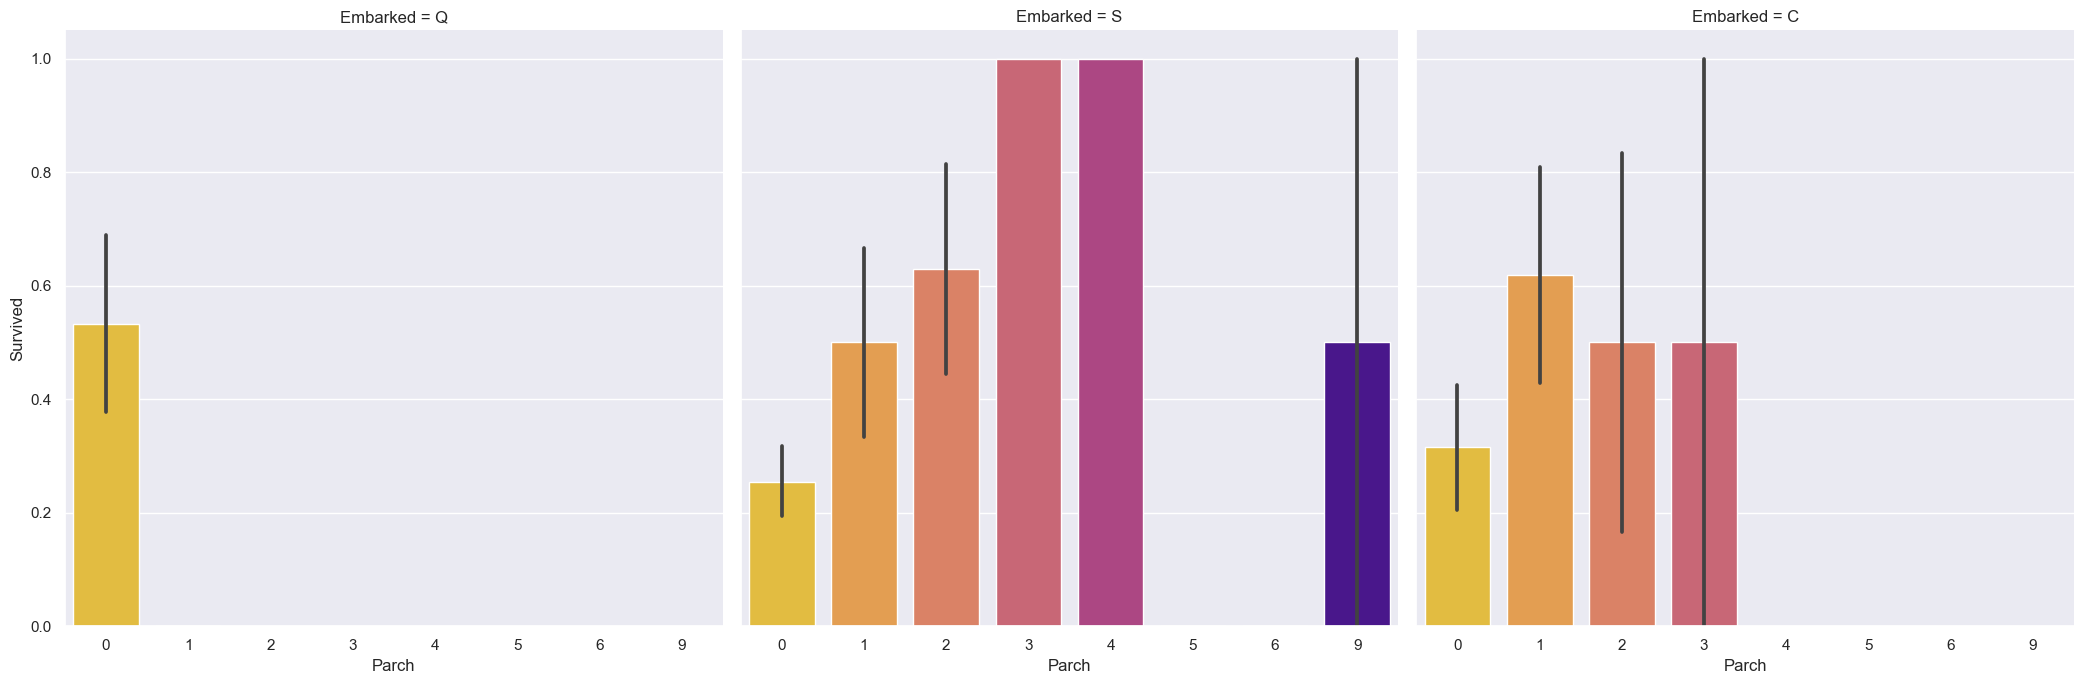

In [254]:
#PARCH

sns.catplot(data=taitanic_data,x='Parch',y='Survived',kind='bar',size=7,col='Embarked',palette='plasma_r')
#sns.set(rc={'figure.figsize':(3,8)})

<AxesSubplot:>

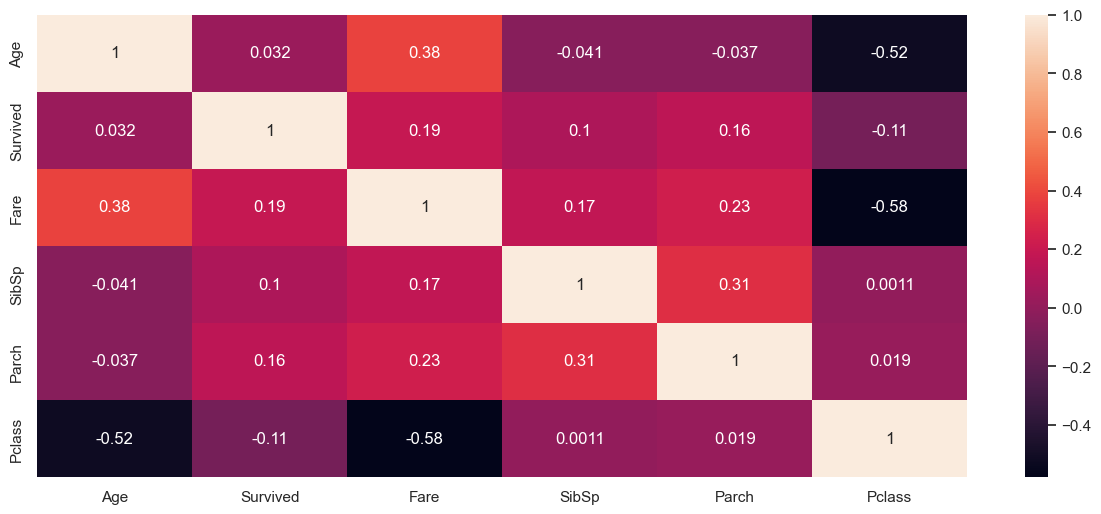

In [168]:
ax=plt.figure(figsize=(15,6))
sns.set(rc={"figure.figsize":(8, 4)})
sns.heatmap(taitanic_data[['Age','Survived','Fare','SibSp','Parch','Pclass']].corr(),annot=True)


In [170]:
taitanic_data=taitanic_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
taitanic_data=taitanic_data.dropna()

In [188]:
sex=pd.get_dummies(taitanic_data['Sex'],drop_first=True)
embarked=pd.get_dummies(taitanic_data['Embarked'],drop_first=True)

In [189]:
data=pd.concat([taitanic_data,sex,embarked],axis=1)
data.drop(['Sex','Embarked'],inplace=True,axis=1)
#female=0
#emabrked=c =(q,s)=(0,0)

In [198]:
data.head()
data.shape

(417, 9)

In [202]:
x=np.array(data.iloc[ :,1:])
y=np.array(data.iloc[: ,0])

In [203]:
x.shape,y.shape

((417, 8), (417,))

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((333, 8), (84, 8), (333,), (84,))

In [240]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [241]:
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
train_predc=model.predict(x_train_scaled)
test_predc=model.predict(x_test_scaled)

In [242]:
score_train=accuracy_score(y_train,train_predc)
score_test=accuracy_score(y_test,test_predc)
confussion_mat_train=confusion_matrix(y_train,train_predc)
confussion_mat_test=confusion_matrix(y_test,test_predc)
classification_report_train=classification_report(y_train,train_predc)
classification_report_test=classification_report(y_test,test_predc)

In [243]:
print("THE TRAINING RESULT")
print(f'THE ACCURACY_SCORE={score_train}')
print(f'THE CONFUSSION_MATRIX={confussion_mat_train}')
print(f'CLASSIFICATION_REPORT={classification_report_train}')
print('\n\n')
print("THE TEST RESULT")
print(f'THE ACCURACY_SCORE={score_test}')
print(f'THE CONFUSSION_MATRIX={confussion_mat_test}')
print(f'CLASSIFICATION_REPORT={classification_report_test}')

THE TRAINING RESULT
THE ACCURACY_SCORE=1.0
THE CONFUSSION_MATRIX=[[200   0]
 [  0 133]]
CLASSIFICATION_REPORT=              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       133

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333




THE TEST RESULT
THE ACCURACY_SCORE=1.0
THE CONFUSSION_MATRIX=[[65  0]
 [ 0 19]]
CLASSIFICATION_REPORT=              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        19

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [247]:
prediction=pd.DataFrame(train_predc)
orginal=pd.DataFrame(y_train)
train_output=pd.concat([orginal,prediction],axis=1)
train_output.head()

,0,0
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [248]:
prediction_test=pd.DataFrame(test_predc)
orginal_test=pd.DataFrame(y_test)
test_output=pd.concat([orginal_test,prediction_test],axis=1)
test_output.head()

,0,0
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
